In [16]:
import cv2
import os
import numpy as np
import tensorflow as tf

2024-02-19 10:00:57.590760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [29]:
images=load_images_from_folder('archive/Train/daisy')
images[0][0]

array([[ 28, 103,  81],
       [ 28, 103,  81],
       [ 31, 104,  82],
       [ 33, 104,  84],
       [ 34, 105,  85],
       [ 34, 106,  86],
       [ 33, 108,  87],
       [ 34, 109,  88],
       [ 41, 110,  89],
       [ 40, 110,  87],
       [ 36, 113,  86],
       [ 54, 122,  97],
       [126, 153, 137],
       [199, 185, 179],
       [208, 196, 194],
       [191, 205, 203],
       [195, 197, 198],
       [195, 197, 197],
       [197, 200, 198],
       [202, 205, 203],
       [204, 208, 203],
       [201, 202, 200],
       [204, 202, 202],
       [212, 209, 211],
       [200, 199, 195],
       [164, 176, 170],
       [ 46, 129, 114],
       [  9, 103,  86],
       [ 43,  99,  88],
       [  1, 106,  85],
       [ 29, 105,  87],
       [ 22, 101,  82],
       [ 19, 104,  84],
       [ 19, 104,  84],
       [ 18, 104,  86],
       [ 18, 104,  86],
       [ 16, 105,  86],
       [ 16, 106,  87],
       [ 14, 106,  89],
       [ 12, 106,  89],
       [ 20, 107,  93],
       [ 16, 107

In [19]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize parameters
        self.W1 = tf.Variable(tf.random.normal([hidden_size, input_size], stddev=0.01))
        self.b1 = tf.Variable(tf.zeros([hidden_size, 1]))
        self.W2 = tf.Variable(tf.random.normal([output_size, hidden_size], stddev=0.01))
        self.b2 = tf.Variable(tf.zeros([output_size, 1]))

    def forward_propagation(self, X):
        # Forward pass
        Z1 = tf.matmul(self.W1, X) + self.b1
        A1 = tf.nn.tanh(Z1)
        Z2 = tf.matmul(self.W2, A1) + self.b2
        A2 = tf.nn.sigmoid(Z2)
        return A2

    def backward_propagation(self, X, Y, learning_rate):
        with tf.GradientTape() as tape:
            predictions = self.forward_propagation(X)
            loss = self.cross_entropy_loss(Y, predictions)
        
        gradients = tape.gradient(loss, [self.W1, self.b1, self.W2, self.b2])
        optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
        optimizer.apply_gradients(zip(gradients, [self.W1, self.b1, self.W2, self.b2]))

    def train(self, X, Y, num_epochs, learning_rate):
        for epoch in range(num_epochs):
            self.backward_propagation(X, Y, learning_rate)
            
            if epoch % 100 == 0:
                predictions = self.forward_propagation(X)
                loss = self.cross_entropy_loss(Y, predictions)
                print(f'Epoch {epoch}, Loss: {loss}')

    def cross_entropy_loss(self, Y, A):
        m = Y.shape[1]
        loss = -tf.reduce_mean(Y * tf.math.log(A) + (1 - Y) * tf.math.log(1 - A))
        return loss


In [31]:
# Load and preprocess the data
X=np.array(load_images_from_folder('archive/Train/daisy')[0][0])
X = X.T.astype(np.float32)

/var/folders/xj/p7xfr92j0r5ckg_frxtysd3h0000gn/T/ipykernel_16442/2539430839.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[0, :], X[1, :], cmap=plt.cm.Spectral)


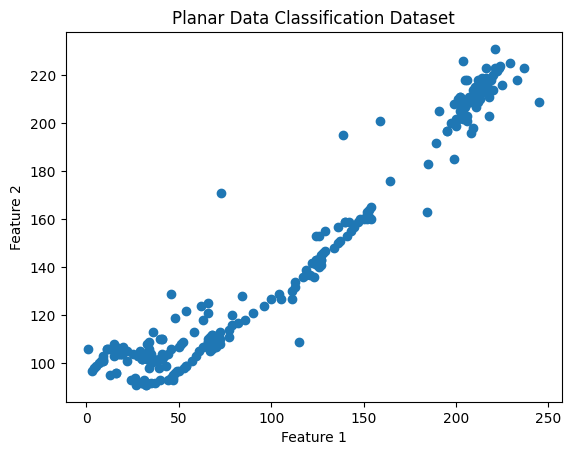

In [32]:
# Plot the data
import matplotlib.pyplot as plt
plt.scatter(X[0, :], X[1, :], cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Planar Data Classification Dataset')
plt.show()

In [38]:
cv2.imshow('image',load_images_from_folder('archive/Train/daisy')[0][0])

In [ ]:
cv2.